In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import operator
import numpy as np
import textwrap

In [39]:
merged = pd.read_csv("/Users/jennysheng/Documents/asian-art-in-american-museums/museum-app/merged_final.csv")

In [4]:
# separate artworks by museum
met = merged.loc[merged.repository == "Metropolitan Museum of Art, New York, NY"]
puam = merged.loc[merged.repository == "Princeton University Art Museum"]
moma = merged.loc[merged.repository == "The Museum of Modern Art"]
cmoa = merged.loc[merged.repository == "Carnegie Museum of Art"]
mia = merged.loc[merged.repository == "Minneapolis Institute of Art"]

In [5]:
# count number of artist overlaps for every museum pair
artist_lists = {}
artist_lists["met"] = met.artistdisplayname.value_counts().keys()
artist_lists["mia"] = mia.artistdisplayname.value_counts().keys()
artist_lists["puam"] = puam.artistdisplayname.value_counts().keys()
artist_lists["cmoa"] = cmoa.artistdisplayname.value_counts().keys()
artist_lists["moma"] = moma.artistdisplayname.value_counts().keys()
keys = [k for k in artist_lists.keys()]
for k in range(len(keys)):
  for j in range(k+1, len(keys)):
    if not j == k:
      print("Number of artist overlap between " + keys[j] + " and " + keys[k])
      overlap = set(artist_lists[keys[k]]).intersection(set(artist_lists[keys[j]]))
      print(len(overlap))

Number of artist overlap between mia and met
335
Number of artist overlap between puam and met
27
Number of artist overlap between cmoa and met
13
Number of artist overlap between moma and met
7
Number of artist overlap between puam and mia
14
Number of artist overlap between cmoa and mia
48
Number of artist overlap between moma and mia
24
Number of artist overlap between cmoa and puam
2
Number of artist overlap between moma and puam
3
Number of artist overlap between moma and cmoa
23


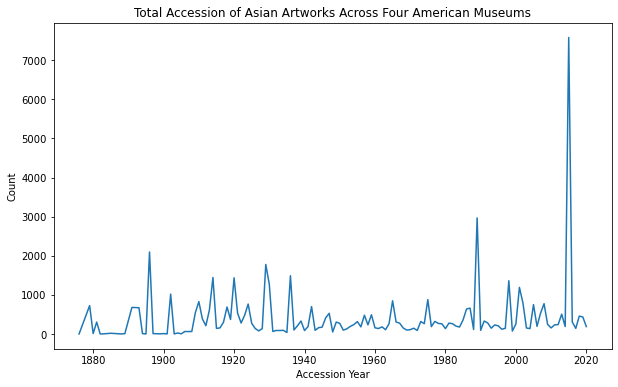

In [7]:
# plot accession year trends for merged dataset
accessionyear= sorted(dict(merged.accessionyear.value_counts()).items())
ax = plt.figure(figsize=(10, 6))
plt.plot([x[0] for x in accessionyear[1:]], [x[1] for x in accessionyear[1:]])
plt.title("Total Accession of Asian Artworks Across Four American Museums")

plt.ylabel("Count")
plt.xlabel("Accession Year")
plt.show()

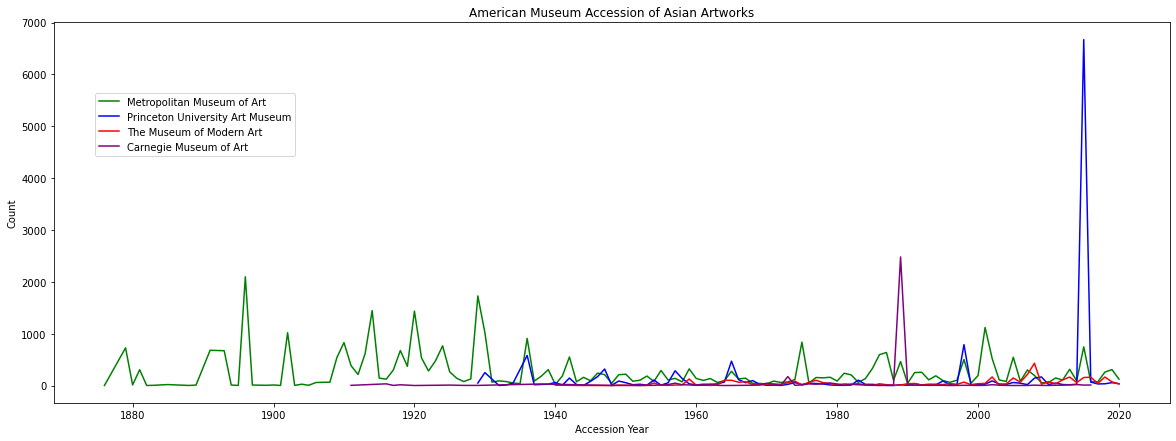

In [8]:
# plot accession year trends for individual museums
met = merged.loc[merged.repository == "Metropolitan Museum of Art, New York, NY"]["accessionyear"].value_counts()
met = sorted(dict(met).items())[1:]
puam = merged.loc[merged.repository == "Princeton University Art Museum"]["accessionyear"].value_counts()
puam = sorted(dict(puam).items())[1:]
moma = merged.loc[merged.repository == "The Museum of Modern Art"]["accessionyear"].value_counts()
moma = sorted(dict(moma).items())[1:]
cmoa = merged.loc[merged.repository == "Carnegie Museum of Art"]["accessionyear"].value_counts()
cmoa = sorted(dict(cmoa).items())[1:]
mia = merged.loc[merged.repository == "Minneapolis Institute of Art"]["accessionyear"].value_counts()
mia = sorted(dict(mia).items())[1:]
ax = plt.figure(figsize=(20, 7))

plt.plot([int(x[0]) for x in met], [x[1] for x in met], color = "green", label='Metropolitan Museum of Art')
plt.plot([int(x[0]) for x in puam], [x[1] for x in puam], color = "blue", label='Princeton University Art Museum')
plt.plot([int(x[0]) for x in moma], [x[1] for x in moma], color = "red", label='The Museum of Modern Art')
plt.plot([int(x[0]) for x in cmoa], [x[1] for x in cmoa], color = "purple", label='Carnegie Museum of Art')
plt.title("American Museum Accession of Asian Artworks")
leg = ax.legend(loc='upper left', bbox_to_anchor=(0.15, 0.75))
plt.ylabel("Count")
plt.xlabel("Accession Year")
plt.show()

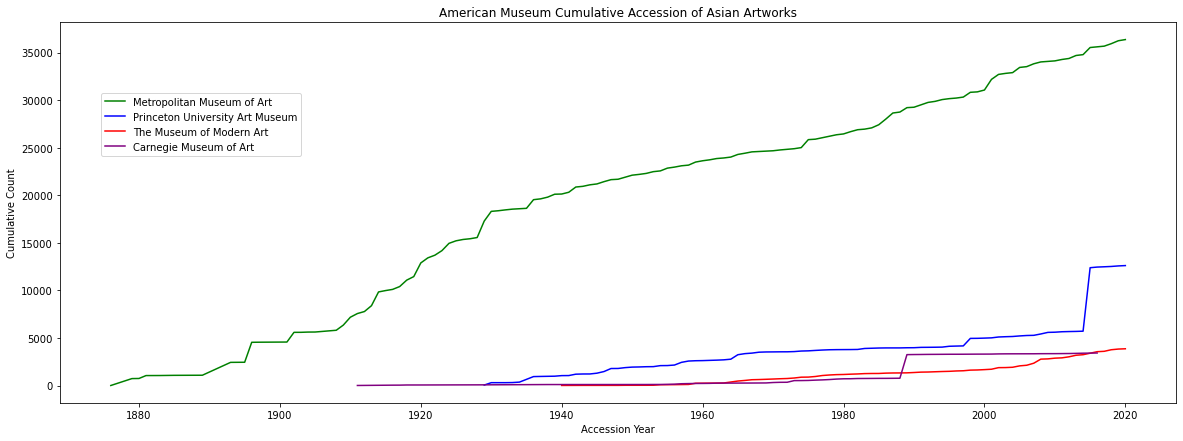

In [9]:
# plot culumative accession year trends for individual museums
met_cumsum = np.cumsum([x[1] for x in met])
puam_cumsum = np.cumsum([x[1] for x in puam])
moma_cumsum = np.cumsum([x[1] for x in moma])
cmoa_cumsum = np.cumsum([x[1] for x in cmoa])
all_cumsum = np.cumsum([x[1] for x in accessionyear])
ax = plt.figure(figsize=(20, 7))
plt.plot([int(x[0]) for x in met], met_cumsum, color = "green", label='Metropolitan Museum of Art')
plt.plot([int(x[0]) for x in puam], puam_cumsum, color = "blue", label='Princeton University Art Museum')
plt.plot([int(x[0]) for x in moma], moma_cumsum, color = "red", label='The Museum of Modern Art')
plt.plot([int(x[0]) for x in cmoa], cmoa_cumsum, color = "purple", label='Carnegie Museum of Art')
plt.title("American Museum Cumulative Accession of Asian Artworks")
plt.ylabel("Cumulative Count")
plt.xlabel("Accession Year")
leg = ax.legend(loc='upper left', bbox_to_anchor=(0.15, 0.75))
plt.show()

In [17]:
# read in country info dataset. This is a merged dataset created from two different dataset mappings. See paper for details
country_info = pd.read_csv("/Users/jennysheng/Documents/asian-art-in-american-museums/museum-app/country_code_merged.csv")
non_asian_nationality = country_info.loc[country_info.region != "Asia"].nationality.tolist()
asian_nationalities = country_info.loc[country_info["region"]=="Asia"]["nationality"].values
asian_countries = country_info.loc[country_info["region"]=="Asia"]["name"].values

In [11]:
country_info

,name,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code,nationality,latitude,longitude
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN,Afghan,33.939110,67.709953
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,NaN,150.0,154.0,NaN,Åland Island,NaN,NaN
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,NaN,150.0,39.0,NaN,Albanian,41.153332,20.168331
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,NaN,2.0,15.0,NaN,Algerian,28.033886,1.659626
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,NaN,9.0,61.0,NaN,American Samoan,-14.270972,-170.132217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,Wallis and Futuna,WF,WLF,876,ISO 3166-2:WF,Oceania,Polynesia,NaN,9.0,61.0,NaN,"Wallis and Futuna, Wallisian or Futunan",-13.768752,-177.156097
245,Western Sahara,EH,ESH,732,ISO 3166-2:EH,Africa,Northern Africa,NaN,2.0,15.0,NaN,"Sahrawi, Sahrawian, Sahraouian",24.215527,-12.885834
246,Yemen,YE,YEM,887,ISO 3166-2:YE,Asia,Western Asia,NaN,142.0,145.0,NaN,Yemeni,15.552727,48.516388
247,Zambia,ZM,ZMB,894,ISO 3166-2:ZM,Africa,Sub-Saharan Africa,Eastern Africa,2.0,202.0,14.0,Zambian,-13.133897,27.849332


In [21]:
# helper function to return lists of sorted counts for different fields
def desc_counts(df, asian_nationalities, asian_countries, column, country_info):
  if column == "culture":
    culture_counts = df[column].value_counts()
    cultures = culture_counts.keys().tolist()
    non_asian_nationality = country_info.loc[country_info.region != "Asia"].nationality.tolist()
    others = ["British", "Greek", "Roman", "European", "African", "Native American", "Attic", "Flemish", "Dutch", "Etruscan", "Italic"]
    non_asian_nationality.extend(others)
    non_asian_country = country_info.loc[country_info.region != "Asia"].name.tolist()
    country_nat = dict(country_info[["name", "nationality"]].values)
    
    counts = {}
    for i in range(len(cultures)):
        cultures[i] = cultures[i].split("|")[0].strip()
        cultures[i] = cultures[i].split("(")[0].strip()
        if cultures[i].strip() not in non_asian_nationality and cultures[i].strip() not in non_asian_country:
          if cultures[i] in country_nat.keys():
              cultures[i] = country_nat[cultures[i]].strip()
          if cultures[i] in counts.keys():
              counts[cultures[i]] = counts[cultures[i]] + culture_counts[i]
          else:
              counts[cultures[i]] = culture_counts[i]
    counts = dict( sorted(counts.items(), key=operator.itemgetter(1),reverse=True))
    return [k for k in counts.keys()], [v for v in counts.values()]
  elif column == "artistdisplayname":
    counts = df[column].value_counts()
    keys = counts.keys().tolist()
    name = ["Anonymous", "Unknown", "unknown", "Unidentified"]
    artist_keys = [keys[i] for i in range(len(keys)) if keys[i].split(" ")[0] not in name]
    artist_counts = [counts[i] for i in range(len(keys)) if keys[i].split(" ")[0] not in name]
    return artist_keys, artist_counts
  else:
    counts = df[column].value_counts()
    keys = counts.keys().tolist()
    return keys, counts


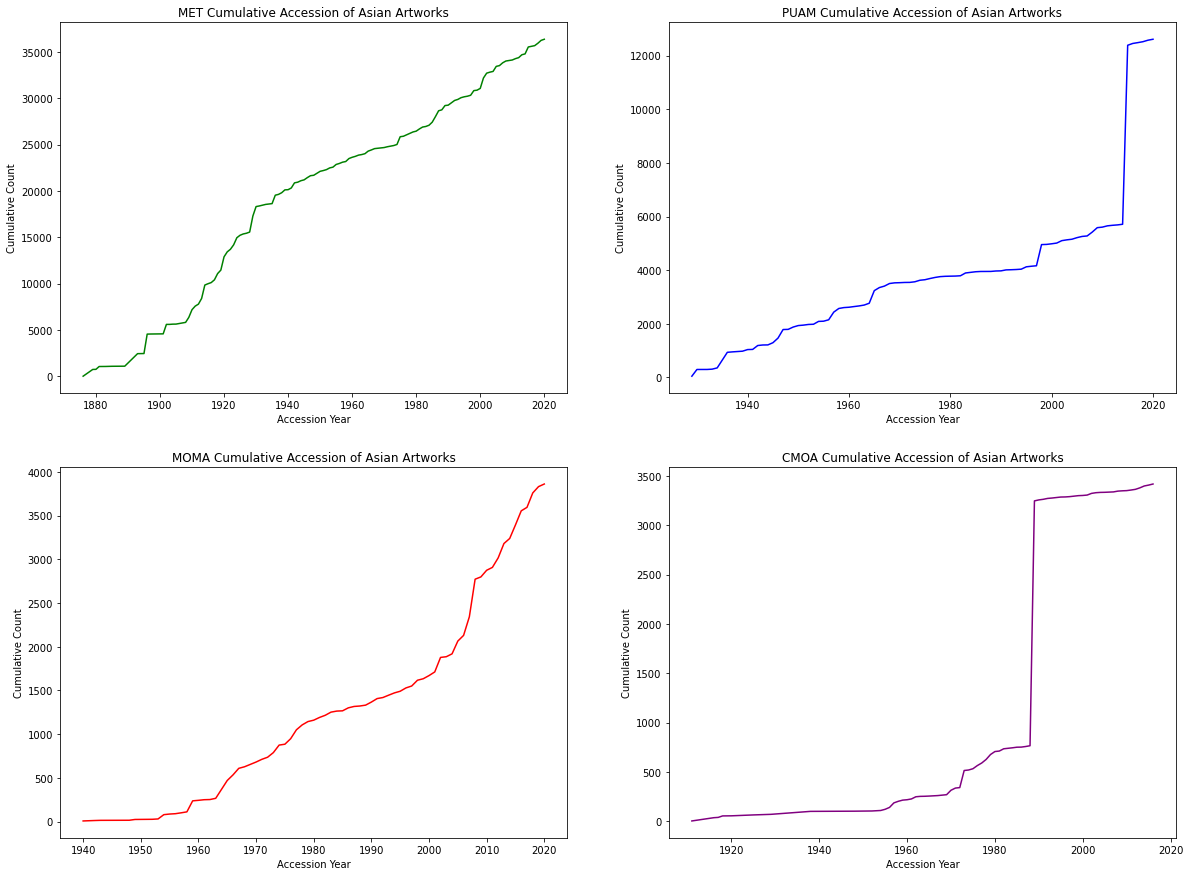

In [23]:
# plot cumulative accession by museum
met_keys, met_values = desc_counts(merged.loc[merged.repository == 'Metropolitan Museum of Art, New York, NY'], asian_nationalities, asian_countries, "culture", country_info)
mia_keys, mia_values = desc_counts(merged.loc[merged.repository == 'Minneapolis Institute of Art'], asian_nationalities, asian_countries, "culture", country_info)
puam_keys, puam_values = desc_counts(merged.loc[merged.repository == 'Princeton University Art Museum'], asian_nationalities, asian_countries, "culture", country_info)
moma_keys, moma_values = desc_counts(merged.loc[merged.repository == 'The Museum of Modern Art'], asian_nationalities, asian_countries, "culture", country_info)
cmoa_keys, cmoa_values = desc_counts(merged.loc[merged.repository == 'Carnegie Museum of Art'], asian_nationalities, asian_countries, "culture", country_info)
all_keys, all_values = desc_counts(merged, asian_nationalities, asian_countries, "culture", country_info)

fig, axs = plt.subplots(2, 2)
fig.set_figheight(15)
fig.set_figwidth(20)
axs[0, 0].plot([int(x[0]) for x in met], met_cumsum, color = "green", label='Metropolitan Museum of Art')
axs[0, 0].set_xlabel("Accession Year")
axs[0, 0].set_ylabel("Cumulative Count")
for tick in axs[0,0].get_xticklabels():
   tick.set_rotation(0)
axs[0, 0].set_title("MET Cumulative Accession of Asian Artworks")

axs[0, 1].plot([int(x[0]) for x in puam], puam_cumsum, color = "blue", label='Princeton University Art Museum')
axs[0, 1].set_xlabel("Accession Year")
axs[0, 1].set_ylabel("Cumulative Count")
for tick in axs[0,1].get_xticklabels():
   tick.set_rotation(0)
axs[0, 1].set_title("PUAM Cumulative Accession of Asian Artworks")

axs[1, 0].plot([int(x[0]) for x in moma], moma_cumsum, color = "red", label='The Museum of Modern Art')
axs[1, 0].set_xlabel("Accession Year")
axs[1, 0].set_ylabel("Cumulative Count")
for tick in axs[1,0].get_xticklabels():
   tick.set_rotation(0)
axs[1, 0].set_title("MOMA Cumulative Accession of Asian Artworks")

axs[1, 1].plot([int(x[0]) for x in cmoa], cmoa_cumsum, color = "purple", label='Carnegie Museum of Art')
axs[1, 1].set_xlabel("Accession Year")
axs[1, 1].set_ylabel("Cumulative Count")
for tick in axs[1,1].get_xticklabels():
   tick.set_rotation(0)
axs[1, 1].set_title("CMOA Cumulative Accession of Asian Artworks")

plt.show()

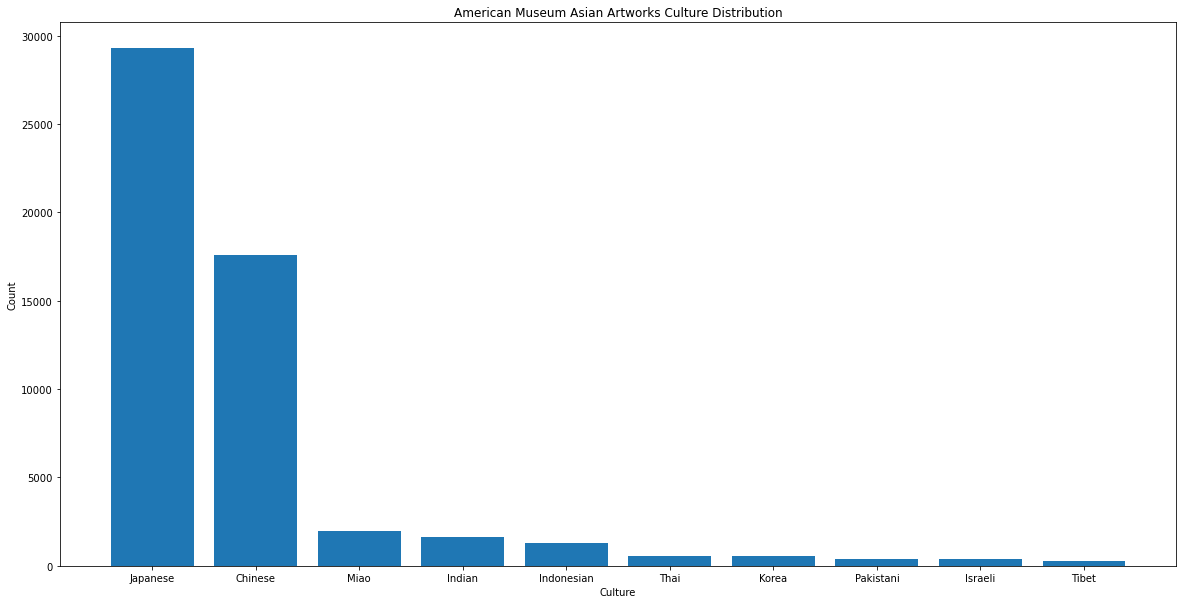

In [25]:
# plot culture distribution in merged dataset
all_keys, all_values = desc_counts(merged, asian_nationalities, asian_countries, "culture", country_info)
ax = plt.figure(figsize=(20, 10))

plt.bar(all_keys[:10], all_values[:10])
plt.title("American Museum Asian Artworks Culture Distribution")
plt.ylabel("Count")
plt.xlabel("Culture")
plt.show()

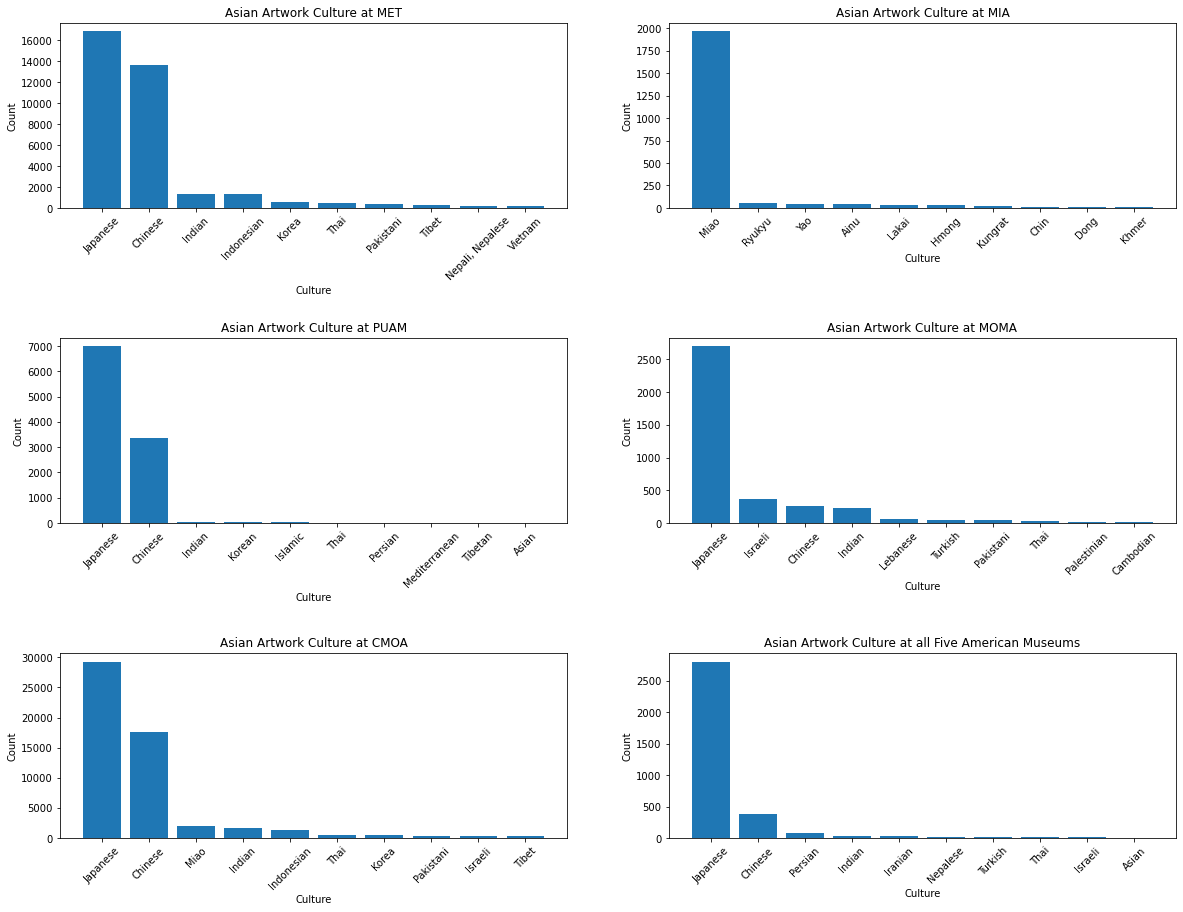

In [29]:
# plot culture distribution by museum
met_keys, met_values = desc_counts(merged.loc[merged.repository == 'Metropolitan Museum of Art, New York, NY'], asian_nationalities, asian_countries, "culture", country_info)
mia_keys, mia_values = desc_counts(merged.loc[merged.repository == 'Minneapolis Institute of Art'], asian_nationalities, asian_countries, "culture", country_info)
puam_keys, puam_values = desc_counts(merged.loc[merged.repository == 'Princeton University Art Museum'], asian_nationalities, asian_countries, "culture", country_info)
moma_keys, moma_values = desc_counts(merged.loc[merged.repository == 'The Museum of Modern Art'], asian_nationalities, asian_countries, "culture", country_info)
cmoa_keys, cmoa_values = desc_counts(merged.loc[merged.repository == 'Carnegie Museum of Art'], asian_nationalities, asian_countries, "culture", country_info)
all_keys, all_values = desc_counts(merged, asian_nationalities, asian_countries, "culture", country_info)

fig, axs = plt.subplots(3, 2)
fig.subplots_adjust(hspace = 0.7)
fig.set_figheight(15)
fig.set_figwidth(20)
axs[0, 0].bar(met_keys[:10], met_values[:10])
axs[0, 0].set_xlabel("Culture")
axs[0, 0].set_ylabel("Count")
for tick in axs[0,0].get_xticklabels():
   tick.set_rotation(45)
axs[0, 0].set_title('Asian Artwork Culture at MET')

axs[0, 1].bar(mia_keys[:10], mia_values[:10])
axs[0, 1].set_xlabel("Culture")
axs[0, 1].set_ylabel("Count")
for tick in axs[0,1].get_xticklabels():
   tick.set_rotation(45)
axs[0, 1].set_title('Asian Artwork Culture at MIA')

axs[1, 0].bar(puam_keys[:10], puam_values[:10])
axs[1, 0].set_xlabel("Culture")
axs[1, 0].set_ylabel("Count")
for tick in axs[1,0].get_xticklabels():
   tick.set_rotation(45)
axs[1, 0].set_title('Asian Artwork Culture at PUAM')

axs[1, 1].bar(moma_keys[:10], moma_values[:10])
axs[1, 1].set_xlabel("Culture")
axs[1, 1].set_ylabel("Count")
for tick in axs[1,1].get_xticklabels():
   tick.set_rotation(45)
axs[1, 1].set_title('Asian Artwork Culture at MOMA')

axs[2, 0].bar(all_keys[:10], all_values[:10])
axs[2, 0].set_xlabel("Culture")
axs[2, 0].set_ylabel("Count")
for tick in axs[2,0].get_xticklabels():
   tick.set_rotation(45)
axs[2, 0].set_title('Asian Artwork Culture at CMOA')

axs[2, 1].bar(cmoa_keys[:10], cmoa_values[:10])
axs[2, 1].set_xlabel("Culture")
axs[2, 1].set_ylabel("Count")
for tick in axs[2,1].get_xticklabels():
   tick.set_rotation(45)
axs[2, 1].set_title('Asian Artwork Culture at all Five American Museums')

plt.show()



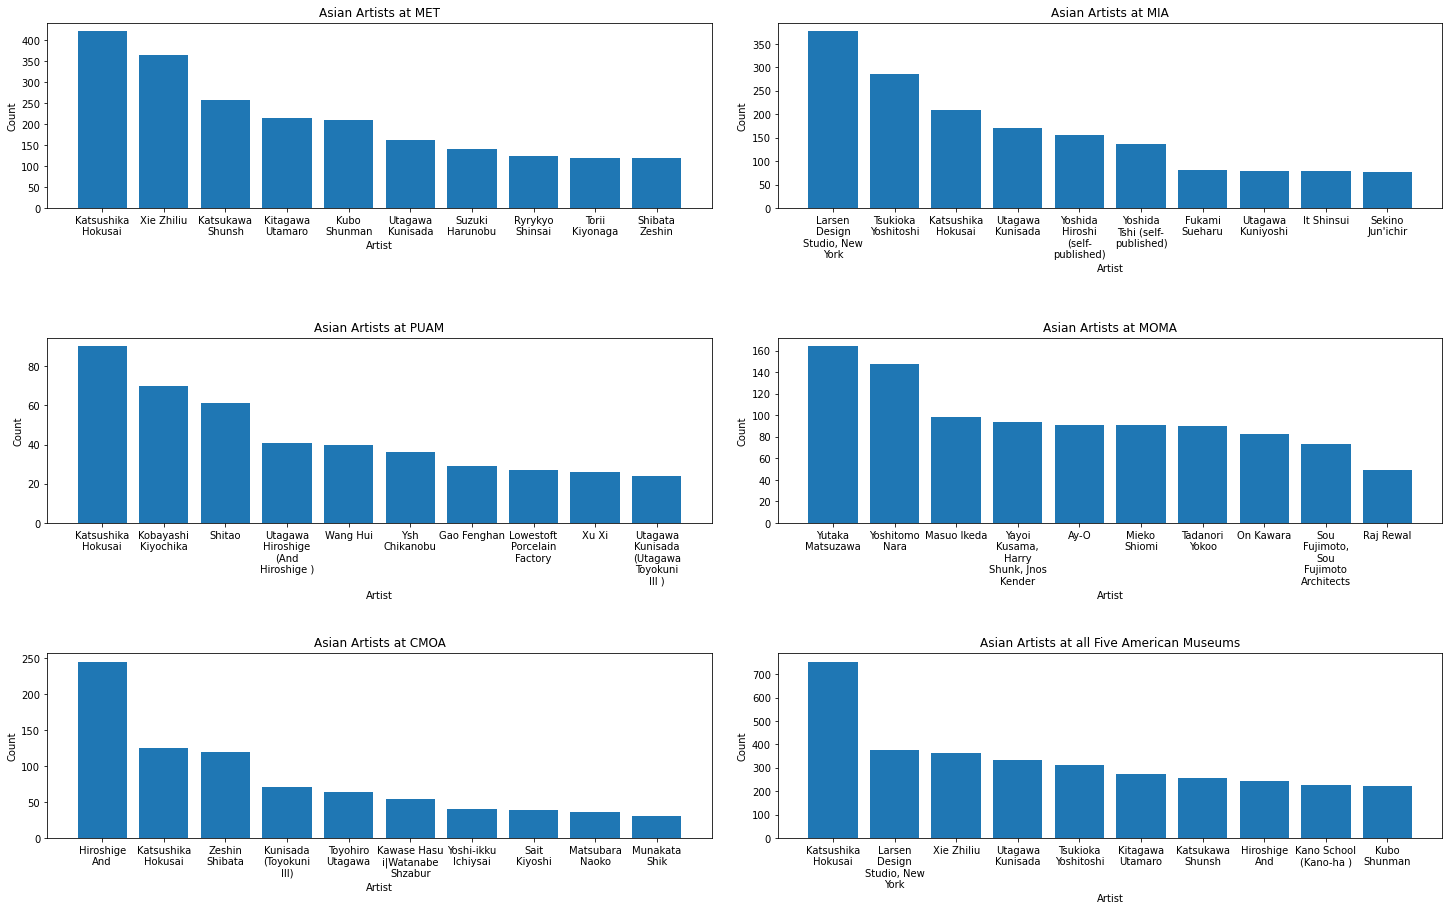

In [30]:
# plot artist distribution by museum
met_keys, met_values = desc_counts(merged.loc[merged.repository == 'Metropolitan Museum of Art, New York, NY'], asian_nationalities, asian_countries, "artistdisplayname", country_info)
mia_keys, mia_values = desc_counts(merged.loc[merged.repository == 'Minneapolis Institute of Art'], asian_nationalities, asian_countries, "artistdisplayname", country_info)
puam_keys, puam_values = desc_counts(merged.loc[merged.repository == 'Princeton University Art Museum'], asian_nationalities, asian_countries, "artistdisplayname", country_info)
moma_keys, moma_values = desc_counts(merged.loc[merged.repository == 'The Museum of Modern Art'], asian_nationalities, asian_countries, "artistdisplayname", country_info)
cmoa_keys, cmoa_values = desc_counts(merged.loc[merged.repository == 'Carnegie Museum of Art'], asian_nationalities, asian_countries, "artistdisplayname", country_info)
all_keys, all_values = desc_counts(merged, asian_nationalities, asian_countries, "artistdisplayname", country_info)
met_keys = ['\n'.join(textwrap.wrap(''.join([i if ord(i) < 128 else '' for i in text]), 11)) for text in met_keys]
mia_keys = ['\n'.join(textwrap.wrap(''.join([i if ord(i) < 128 else '' for i in text]), 11)) for text in mia_keys]
puam_keys = ['\n'.join(textwrap.wrap(''.join([i if ord(i) < 128 else '' for i in text]), 11)) for text in puam_keys]
cmoa_keys = ['\n'.join(textwrap.wrap(''.join([i if ord(i) < 128 else '' for i in text]), 11)) for text in cmoa_keys]
moma_keys = ['\n'.join(textwrap.wrap(''.join([i if ord(i) < 128 else '' for i in text]), 11)) for text in moma_keys]
all_keys = ['\n'.join(textwrap.wrap(''.join([i if ord(i) < 128 else '' for i in text]), 11)) for text in all_keys]
fig, axs = plt.subplots(3, 2)
fig.subplots_adjust(hspace = 0.7)
fig.subplots_adjust(wspace = 0.1)
fig.set_figheight(15)
fig.set_figwidth(25)
axs[0, 0].bar(met_keys[1:11], met_values[1:11])
axs[0, 0].set_xlabel("Artist")
axs[0, 0].set_ylabel("Count")
for tick in axs[0,0].get_xticklabels():
   tick.set_rotation(0)
axs[0, 0].set_title('Asian Artists at MET')

axs[0, 1].bar(mia_keys[1:11], mia_values[1:11])
axs[0, 1].set_xlabel("Artist")
axs[0, 1].set_ylabel("Count")
for tick in axs[0,1].get_xticklabels():
   tick.set_rotation(0)
axs[0, 1].set_title('Asian Artists at MIA')

axs[1, 0].bar(puam_keys[1:11], puam_values[1:11])
axs[1, 0].set_xlabel("Artist")
axs[1, 0].set_ylabel("Count")
for tick in axs[1,0].get_xticklabels():
   tick.set_rotation(0)
axs[1, 0].set_title('Asian Artists at PUAM')

axs[1, 1].bar(moma_keys[:10], moma_values[:10])
axs[1, 1].set_xlabel("Artist")
axs[1, 1].set_ylabel("Count")
for tick in axs[1,1].get_xticklabels():
   tick.set_rotation(0)
axs[1, 1].set_title('Asian Artists at MOMA')


axs[2, 0].bar(cmoa_keys[:10], cmoa_values[:10])
axs[2, 0].set_xlabel("Artist")
axs[2, 0].set_ylabel("Count")
for tick in axs[2,0].get_xticklabels():
   tick.set_rotation(0)
axs[2, 0].set_title('Asian Artists at CMOA')

axs[2, 1].bar(all_keys[1:11], all_values[1:11])
axs[2, 1].set_xlabel("Artist")
axs[2, 1].set_ylabel("Count")
for tick in axs[2,1].get_xticklabels():
   tick.set_rotation(0)
axs[2, 1].set_title('Asian Artists at all Five American Museums')


plt.show()



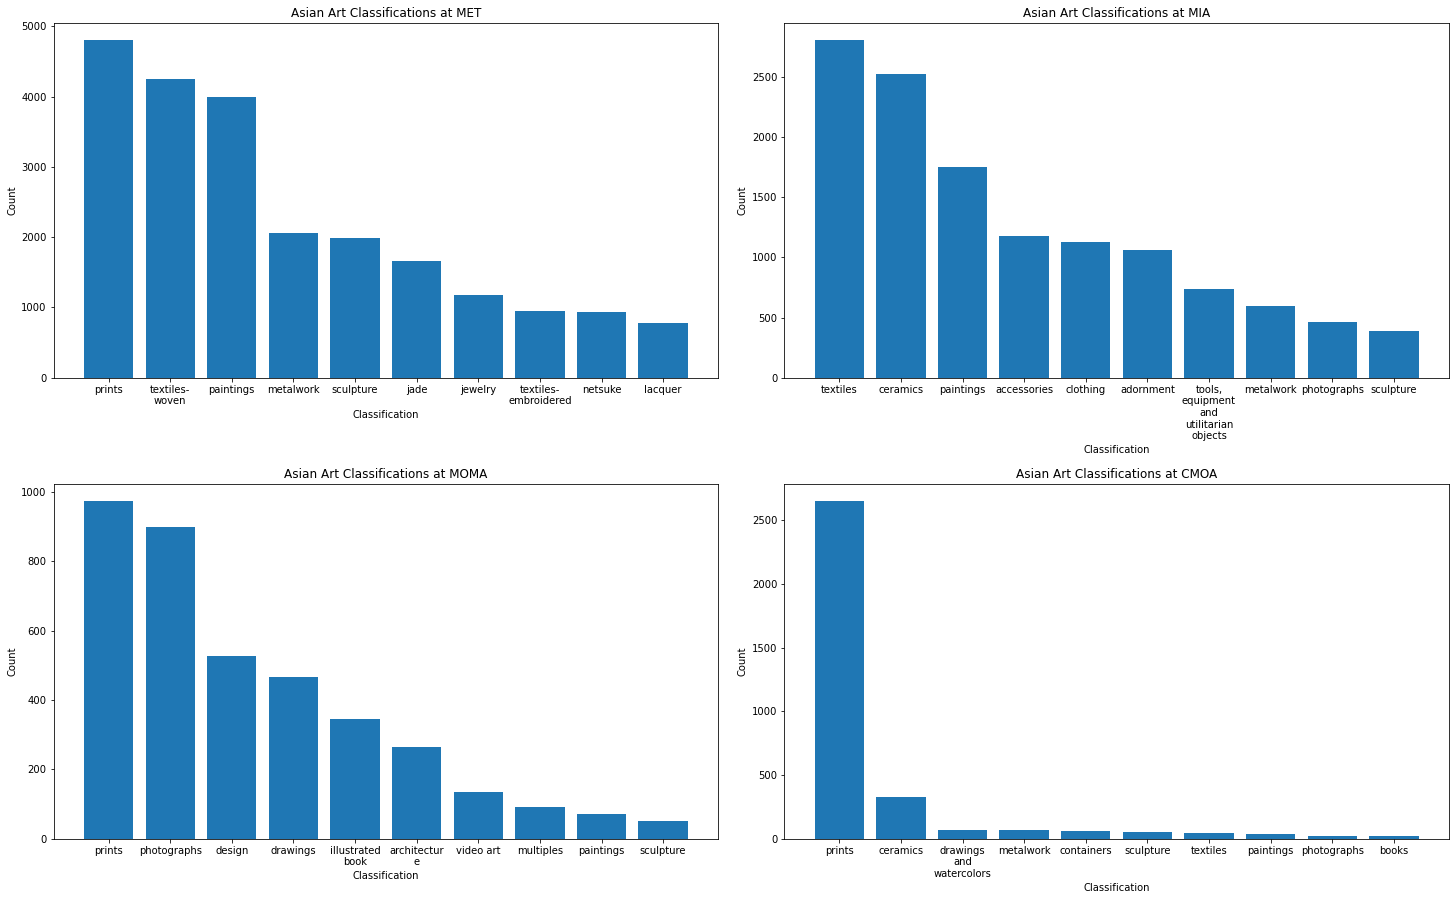

In [31]:
# # plot classification distribution by museum
met_keys, met_values = desc_counts(merged.loc[merged.repository == 'Metropolitan Museum of Art, New York, NY'], asian_nationalities, asian_countries, "classification", country_info)
mia_keys, mia_values = desc_counts(merged.loc[merged.repository == 'Minneapolis Institute of Art'], asian_nationalities, asian_countries, "classification", country_info)
puam_keys, puam_values = desc_counts(merged.loc[merged.repository == 'Princeton University Art Museum'], asian_nationalities, asian_countries, "classification", country_info)
moma_keys, moma_values = desc_counts(merged.loc[merged.repository == 'The Museum of Modern Art'], asian_nationalities, asian_countries, "classification", country_info)
cmoa_keys, cmoa_values = desc_counts(merged.loc[merged.repository == 'Carnegie Museum of Art'], asian_nationalities, asian_countries, "classification", country_info)
all_keys, all_values = desc_counts(merged, asian_nationalities, asian_countries, "classification", country_info)
met_keys = ['\n'.join(textwrap.wrap(''.join([i if ord(i) < 128 else '' for i in text]), 11)) for text in met_keys]
mia_keys = ['\n'.join(textwrap.wrap(''.join([i if ord(i) < 128 else '' for i in text]), 11)) for text in mia_keys]
puam_keys = ['\n'.join(textwrap.wrap(''.join([i if ord(i) < 128 else '' for i in text]), 11)) for text in puam_keys]
cmoa_keys = ['\n'.join(textwrap.wrap(''.join([i if ord(i) < 128 else '' for i in text]), 11)) for text in cmoa_keys]
moma_keys = ['\n'.join(textwrap.wrap(''.join([i if ord(i) < 128 else '' for i in text]), 11)) for text in moma_keys]
all_keys = ['\n'.join(textwrap.wrap(''.join([i if ord(i) < 128 else '' for i in text]), 11)) for text in all_keys]
fig, axs = plt.subplots(2, 2)
fig.subplots_adjust(hspace = 0.3)
fig.subplots_adjust(wspace = 0.1)
fig.set_figheight(15)
fig.set_figwidth(25)
axs[0, 0].bar(met_keys[1:11], met_values[1:11])
axs[0, 0].set_xlabel("Classification")
axs[0, 0].set_ylabel("Count")
for tick in axs[0,0].get_xticklabels():
   tick.set_rotation(0)
axs[0, 0].set_title('Asian Art Classifications at MET')

axs[0, 1].bar(mia_keys[1:11], mia_values[1:11])
axs[0, 1].set_xlabel("Classification")
axs[0, 1].set_ylabel("Count")
for tick in axs[0,1].get_xticklabels():
   tick.set_rotation(0)
axs[0, 1].set_title('Asian Art Classifications at MIA')

axs[1, 0].bar(moma_keys[:10], moma_values[:10])
axs[1, 0].set_xlabel("Classification")
axs[1, 0].set_ylabel("Count")
for tick in axs[1,0].get_xticklabels():
   tick.set_rotation(0)
axs[1, 0].set_title('Asian Art Classifications at MOMA')


axs[1, 1].bar(cmoa_keys[:10], cmoa_values[:10])
axs[1, 1].set_xlabel("Classification")
axs[1, 1].set_ylabel("Count")
for tick in axs[1,1].get_xticklabels():
   tick.set_rotation(0)
axs[1, 1].set_title('Asian Art Classifications at CMOA')

plt.show()



In [33]:
# helper function to return a list of sorted accession counts by culture
def plot_culture_accession(df, culture):
  if culture == "Persian":
    culture_df = df.loc[df.culture.notna()]
    culture_df = culture_df.loc[culture_df.culture.str.contains("Persian") | culture_df.culture.str.contains("Iranian") ]
    culture_df = culture_df.loc[culture_df.accessionyear.notna()]
  else:
    culture_df = df.loc[df.culture.notna()]
    culture_df = culture_df.loc[culture_df.culture.str.contains(culture)]
    culture_df = culture_df.loc[culture_df.accessionyear.notna()]
  return culture_df

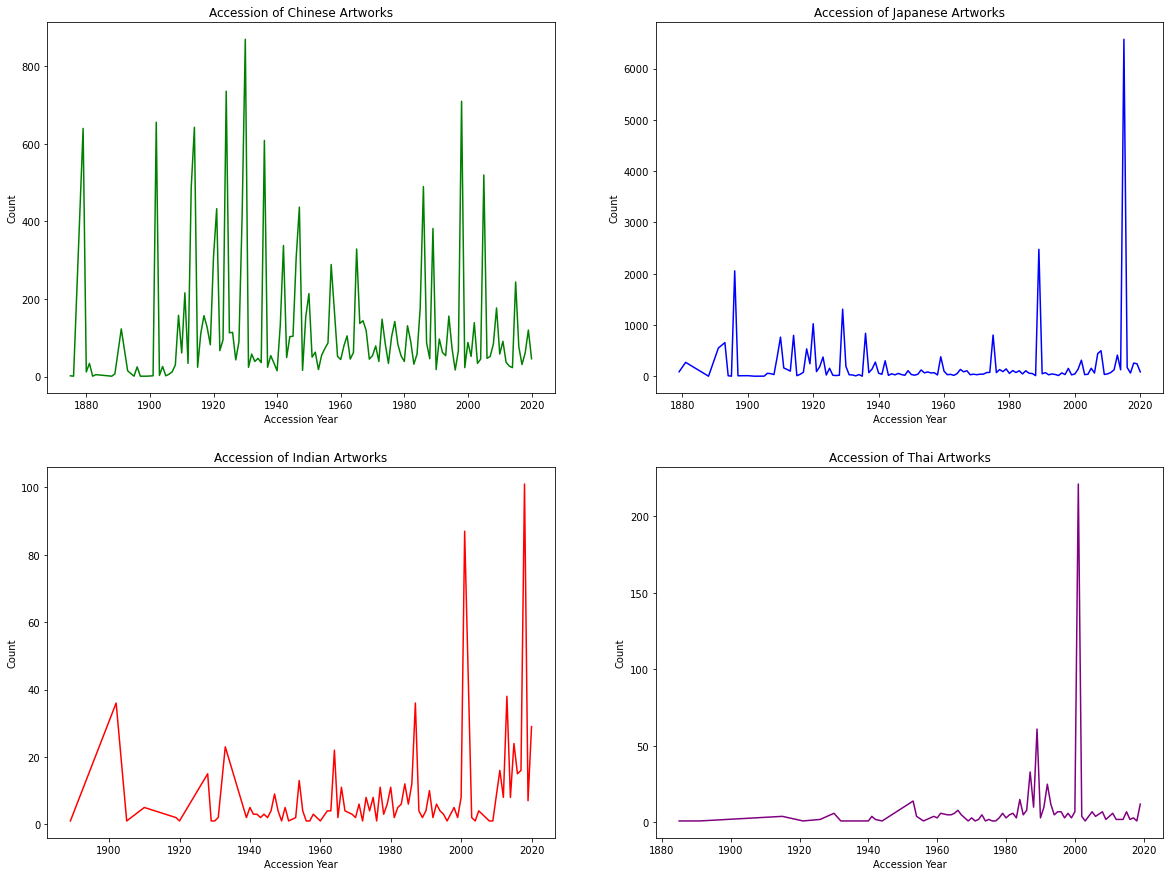

In [35]:
# plot accession by cultures
chinese = plot_culture_accession(merged, "Chinese")
accession_chinese = sorted(dict(chinese.accessionyear.value_counts()).items())
japanese = plot_culture_accession(merged, "Japanese")
accession_japanese = sorted(dict(japanese.accessionyear.value_counts()).items())
miao = plot_culture_accession(merged, "Miao")
accession_miao = sorted(dict(miao.accessionyear.value_counts()).items())
indian = plot_culture_accession(merged, "Indian")
accession_indian = sorted(dict(indian.accessionyear.value_counts()).items())
indonesian = plot_culture_accession(merged, "Indonesian")
accession_indonesian = sorted(dict(indonesian.accessionyear.value_counts()).items())
thai = plot_culture_accession(merged, "Thai")
accession_thai = sorted(dict(thai.accessionyear.value_counts()).items())

fig, axs = plt.subplots(2, 2)
fig.set_figheight(15)
fig.set_figwidth(20)
axs[0, 0].plot([int(x[0]) for x in accession_chinese], [x[1] for x in accession_chinese], color = "green", label='Accession of Chinese Artworks')
axs[0, 0].set_xlabel("Accession Year")
axs[0, 0].set_ylabel("Count")
for tick in axs[0,0].get_xticklabels():
   tick.set_rotation(0)
axs[0, 0].set_title("Accession of Chinese Artworks")

axs[0, 1].plot([int(x[0]) for x in accession_japanese], [x[1] for x in accession_japanese], color = "blue", label='Accession of Japanese Artworks')
axs[0, 1].set_xlabel("Accession Year")
axs[0, 1].set_ylabel("Count")
for tick in axs[0,1].get_xticklabels():
   tick.set_rotation(0)
axs[0, 1].set_title("Accession of Japanese Artworks")

axs[1, 0].plot([int(x[0]) for x in accession_indian], [x[1] for x in accession_indian], color = "red", label='Accession of Indian Artworks')
axs[1, 0].set_xlabel("Accession Year")
axs[1, 0].set_ylabel("Count")
for tick in axs[1,0].get_xticklabels():
   tick.set_rotation(0)
axs[1, 0].set_title("Accession of Indian Artworks")

axs[1, 1].plot([int(x[0]) for x in accession_thai], [x[1] for x in accession_thai], color = "purple", label='Accession of Thai Artworks')
axs[1, 1].set_xlabel("Accession Year")
axs[1, 1].set_ylabel("Count")
for tick in axs[1, 1].get_xticklabels():
   tick.set_rotation(0)
axs[1, 1].set_title("Accession of Thai Artworks")

plt.show()


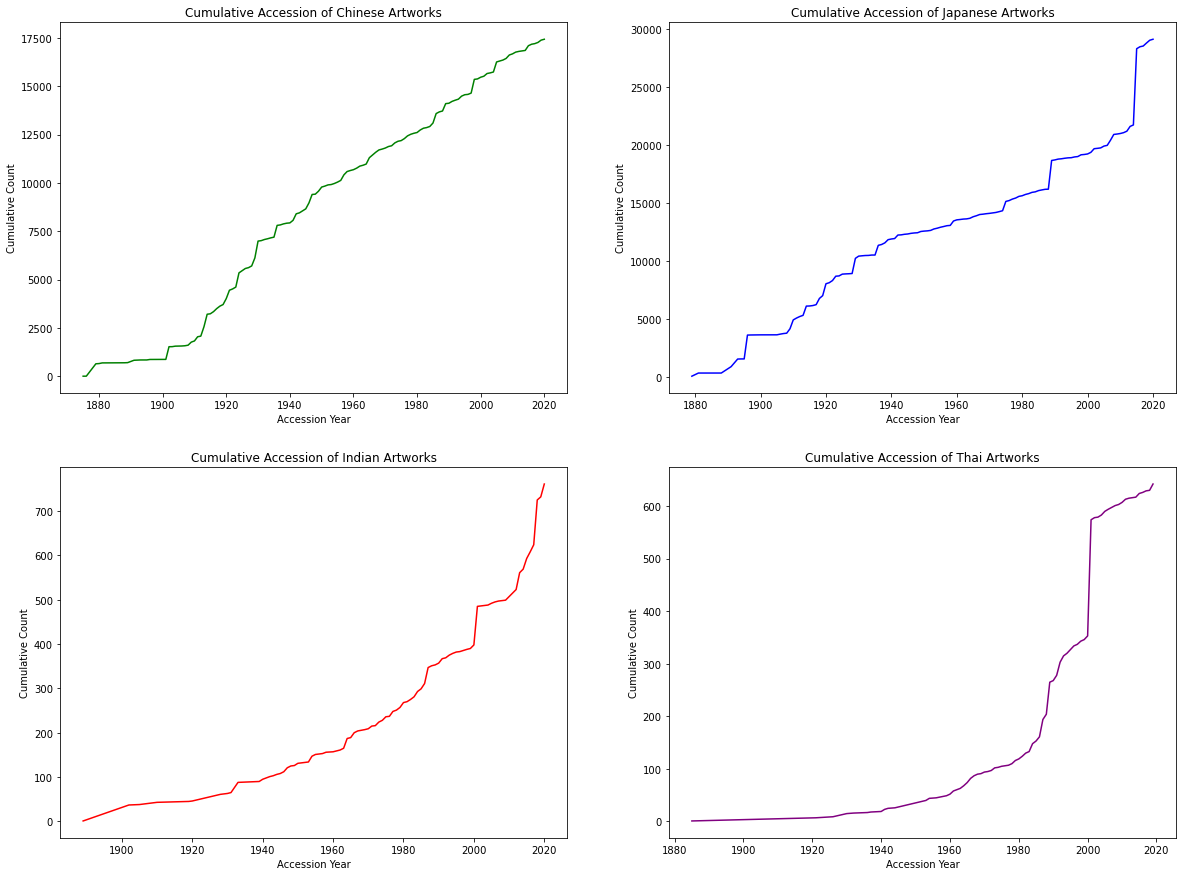

In [36]:
# plot culumative accession for cultures
chinese = plot_culture_accession(merged, "Chinese")
accession_chinese = sorted(dict(chinese.accessionyear.value_counts()).items())
chinese_cumsum = np.cumsum([x[1] for x in accession_chinese])
japanese = plot_culture_accession(merged, "Japanese")
accession_japanese = sorted(dict(japanese.accessionyear.value_counts()).items())
japanese_cumsum = np.cumsum([x[1] for x in accession_japanese])
indian = plot_culture_accession(merged, "Indian")
accession_indian = sorted(dict(indian.accessionyear.value_counts()).items())
indian_cumsum = np.cumsum([x[1] for x in accession_indian])
thai = plot_culture_accession(merged, "Thai")
accession_thai = sorted(dict(thai.accessionyear.value_counts()).items())
thai_cumsum = np.cumsum([x[1] for x in accession_thai])

fig, axs = plt.subplots(2, 2)
# fig.subplots_adjust(hspace = 0.7)
fig.set_figheight(15)
fig.set_figwidth(20)
axs[0, 0].plot([int(x[0]) for x in accession_chinese], chinese_cumsum, color = "green", label='Cumulative Accession of Chinese Artworks')
axs[0, 0].set_xlabel("Accession Year")
axs[0, 0].set_ylabel("Cumulative Count")
for tick in axs[0,0].get_xticklabels():
   tick.set_rotation(0)
axs[0, 0].set_title("Cumulative Accession of Chinese Artworks")

axs[0, 1].plot([int(x[0]) for x in accession_japanese], japanese_cumsum, color = "blue", label='Cumulative Accession of Japanese Artworks')
axs[0, 1].set_xlabel("Accession Year")
axs[0, 1].set_ylabel("Cumulative Count")
for tick in axs[0,1].get_xticklabels():
   tick.set_rotation(0)
axs[0, 1].set_title("Cumulative Accession of Japanese Artworks")

axs[1, 0].plot([int(x[0]) for x in accession_indian], indian_cumsum, color = "red", label='Cumulative Accession of Indian Artworks')
axs[1, 0].set_xlabel("Accession Year")
axs[1, 0].set_ylabel("Cumulative Count")
for tick in axs[1,0].get_xticklabels():
   tick.set_rotation(0)
axs[1, 0].set_title("Cumulative Accession of Indian Artworks")

axs[1, 1].plot([int(x[0]) for x in accession_thai], thai_cumsum, color = "purple", label='Cumulative Accession of Thai Artworks')
axs[1, 1].set_xlabel("Accession Year")
axs[1, 1].set_ylabel("Cumulative Count")
for tick in axs[1,1].get_xticklabels():
   tick.set_rotation(0)
axs[1, 1].set_title("Cumulative Accession of Thai Artworks")

plt.show()
